In [114]:
# Dependencies
import requests
import json
import pandas as pd

# Google developer API key
from config import gkey,gkey_places

file_one = "LA_cities_Lat_lng_codes_data.csv"
cities_df = pd.read_csv(file_one, encoding = "ISO-8859-1")

cities_df.head()
file_one_df=cities_df[:]

In [115]:
# Create an empty column for bank count
cities_df["airport"]=None

base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

for index, row in file_one_df.iterrows():
    target_coordinates = str(row["lat"]) +","+str(row["lng"]) 
    target_radius = 3000
    target_type = "airport"
    #target_keyword ="airport"

    params = {
        "location": target_coordinates,
        "radius": target_radius,
        "type": target_type,
        "key": gkey_places}
        #"keyword": target_keyword}

    response = requests.get(base_url, params=params)
    airport_data = response.json()

    #print(json.dumps(airport_data, indent=4, sort_keys=True))

    counter = 0
    for airport in airport_data["results"]:
        #print(airport["name"])
        #print(airport["vicinity"])
        #print(airport["name"].upper().find("AIRPORT"))
        
        if airport["name"].upper().find("AIRPORT")>0:
            counter += 1
            
        
    cities_df.set_value(index,"airport",counter)

In [116]:
# Create an empty column for bank count
cities_df["public_transportation"]=None

base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

for index, row in file_one_df.iterrows():
    target_coordinates = str(row["lat"]) +","+str(row["lng"]) 
    target_radius = 3000
    target_type = ["light_rail_station",
                "transit_station","subway_station"]
    #target_keyword ="bank"

    params = {
        "location": target_coordinates,
        "radius": target_radius,
        "type": target_type,
        "key": gkey_places}
        #"keyword": target_keyword}

    response = requests.get(base_url, params=params)
    train_data = response.json()

    #print(json.dumps(train_data, indent=4, sort_keys=True))

    counter = 0
    for train in train_data["results"]:
        #print(train["name"])
        #print(train["vicinity"])
        counter += 1
        
    cities_df.set_value(index,"public_transportation",counter)

In [117]:
# Create an empty column for bank count
cities_df["park"]=None

base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

for index, row in file_one_df.iterrows():
    target_coordinates = str(row["lat"]) +","+str(row["lng"]) 
    target_radius = 3000
    target_type = "park"
    #target_keyword ="bank"

    params = {
        "location": target_coordinates,
        "radius": target_radius,
        "type": target_type,
        "key": gkey_places}
        #"keyword": target_keyword}

    response = requests.get(base_url, params=params)
    park_data = response.json()

    #print(json.dumps(park_data, indent=4, sort_keys=True))

    counter = 0
    for park in park_data["results"]:
        #print(park["name"])
        #print(park["vicinity"])
        #print(park["rating"])
        #if park["rating"]>3:
        counter += 1
                
    cities_df.set_value(index,"park",counter)

In [118]:
# Create an empty column for bank count
cities_df["shopping_mall"]=None

base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

for index, row in file_one_df.iterrows():
    target_coordinates = str(row["lat"]) +","+str(row["lng"]) 
    target_radius = 3000
    target_type = "shopping_mall"
    #target_keyword ="bank"

    params = {
        "location": target_coordinates,
        "radius": target_radius,
        "type": target_type,
        "key": gkey_places}
        #"keyword": target_keyword}

    response = requests.get(base_url, params=params)
    shopping_mall_data = response.json()

    #print(json.dumps(shopping_mall_data, indent=4, sort_keys=True))

    counter = 0
    for shopping_mall in shopping_mall_data["results"]:
        #print(shopping_mall["name"])
        #print(shopping_mall["vicinity"])
        #print(shopping_mall["rating"])
        
        try:
            if shopping_mall["rating"]>4:
                counter += 1
        except KeyError:
            continue
        
                
    cities_df.set_value(index,"shopping_mall",counter)
    

In [119]:
# Change Column name
cities_df=cities_df.rename(columns={"address":"City"})

In [120]:
# Getting only necessary columns
cities_dfb=cities_df[['City','public_transportation','park','shopping_mall','airport']]

In [135]:
cities_dfb.head()

,City,public_transportation,park,shopping_mall,airport
0,Los Angeles,7,17,12,0
1,Long Beach,6,16,8,0
2,Glendale,0,19,11,0
4,Palmdale,0,9,2,0
5,Santa Clarita,0,15,9,0


In [122]:
#slicing for the cities that we are doing 
part1=cities_dfb.loc[0:2,:]
part2=cities_dfb.loc[4:5,:]
part3=cities_dfb.loc[7:9,:]
part4=pd.DataFrame(cities_dfb.loc[14,:]).T
part5=pd.DataFrame(cities_dfb.loc[18,:]).T

In [ ]:
#slicing for the cities that we are doing 
cities_dfb=pd.concat([part1,part2,part3,part4,part5])
cities_df_copy=cities_dfb[:]
cities_dfb

In [129]:
#slicing for the cities that we are doing 
cities_dfb

,City,public_transportation,park,shopping_mall,airport
0,Los Angeles,7,17,12,0
1,Long Beach,6,16,8,0
2,Glendale,0,19,11,0
4,Palmdale,0,9,2,0
5,Santa Clarita,0,15,9,0
7,Torrance,0,18,10,0
8,Pasadena,5,16,11,0
9,Inglewood,0,20,5,1
14,Burbank,0,19,7,1
18,Alhambra,0,20,11,0


In [130]:
##Unpivot data for Seaborn plots
cities_dfc=pd.melt(cities_dfb, id_vars=['City'], value_vars=['public_transportation','park','shopping_mall','airport'])

In [ ]:
#plotting groupped bar plot
cities=cities_dfb[['City']]
cities_dfc.head()

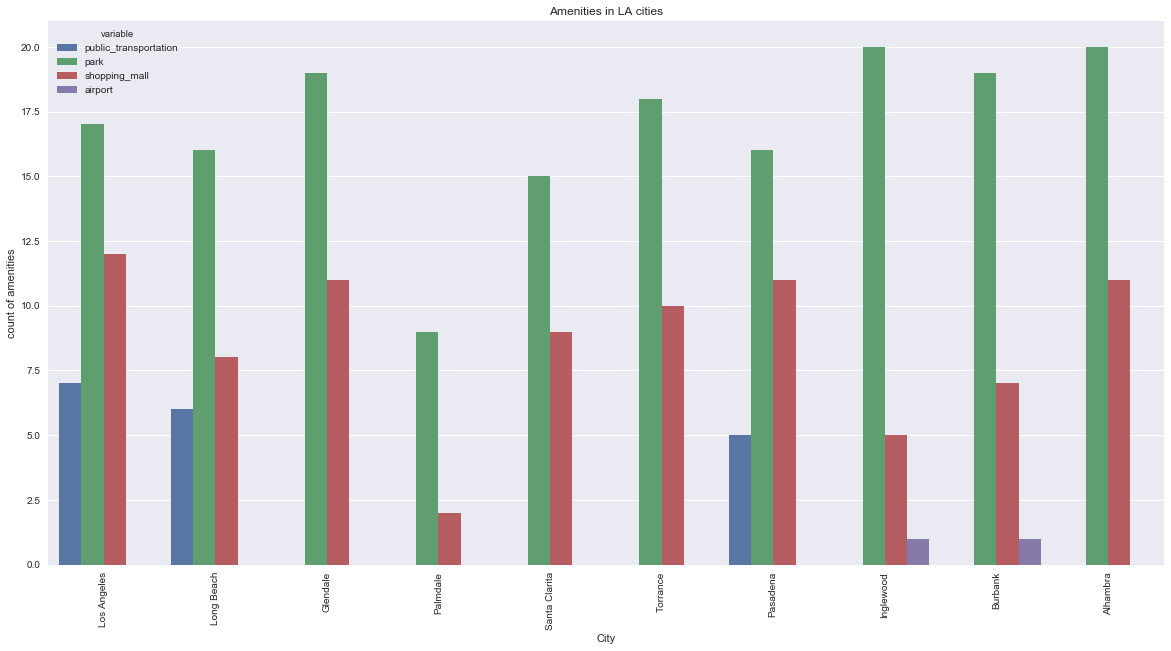

In [137]:
#plotting groupped bar plot
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,10))
sns.barplot(x='City', y='value', hue='variable', data=cities_dfc)
plt.xticks(rotation=90)

plt.ylabel('count of amenities')
plt.title('Amenities in LA cities')
plt.show()

In [134]:
#Saving the Figure
plt.savefig('Amenities in LA cites.png')